# Big Mart Sales Prediction

## 1. Introduction to the problem:

In this problem, we will have a look at the data scientists at BigMart collected regarding the sales of stores in various cities in 2013. Our main target is to evaluate the properties of our data set and predict the sales at a particular store.

## 2. Data analysis:

We will first have a look at our data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [2]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Next we will have a look at our numerical attributes and see their relationship with our target variable

In [3]:
num_features = train.select_dtypes(include=[np.number])
corr=num_features.corr()
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

From this result we can clearly see that Item_MRP have the biggest correlation and Item_Visibility have the lowest correlation with our target variable. Next we will investigate our categorical attributes and see their relationship with our target variable. First off, we have Item_Fat_Content.

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

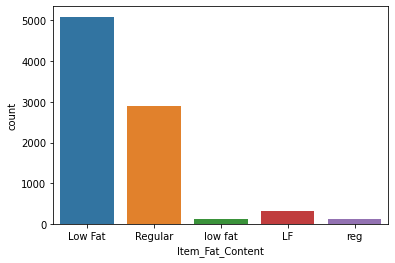

In [4]:
import seaborn as sns
sns.countplot(train.Item_Fat_Content)

From this plot, we can see that the amount of items that have low fat content (labeled "Low Fat", "LF", "low fat") are much higher than regular fat content (labeled "Regular", "reg"). Next we have Item_Type.

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

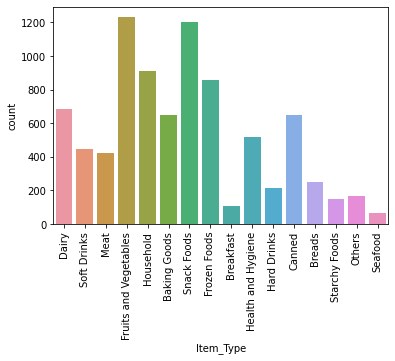

In [5]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

There are 16 different type of items as shown in this plot which is a high number. Next up is Outlet_Size

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

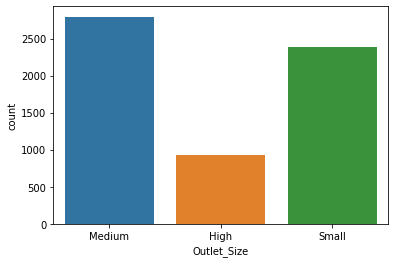

In [6]:
sns.countplot(train.Outlet_Size)

It seems that there are much lower number of high-sized stores compare to medium and small stores. We have Outlet_Location_Type next

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

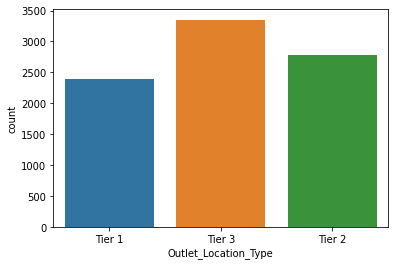

In [7]:
sns.countplot(train.Outlet_Location_Type)

We can clearly see that Tier 3 type of location is slightly higher than tier 1 and 2. Finally we have Outlet_Type.

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

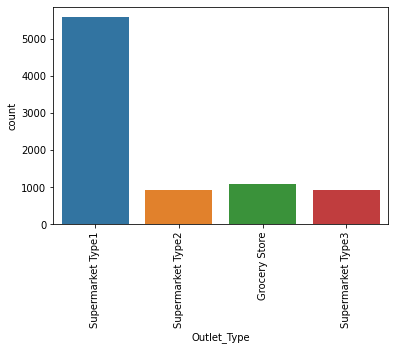

In [8]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

Supermarket Type 1 are clearly the dominant type of Outlet Type as we can infer from this plot compared with Supermarket Type 2, Supermarket Type 3 and Grocery Store. And that is all for the analysis of univariate variables. Next we will see closer the relationship of each predictors to our target variable. First is Item_Weight with Item_Outlet_Sales.

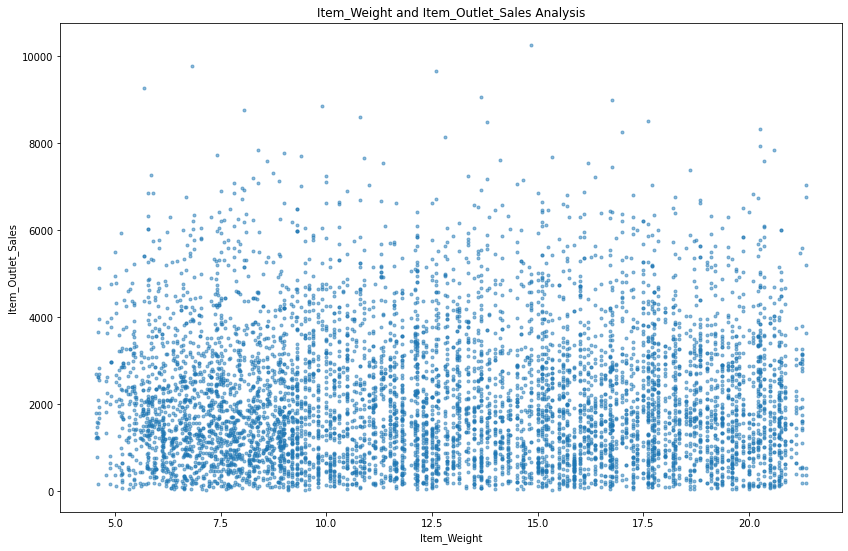

In [9]:
plt.figure(figsize=(14,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.5)

Next is Item_Visibility with Item_Outlet_Sales

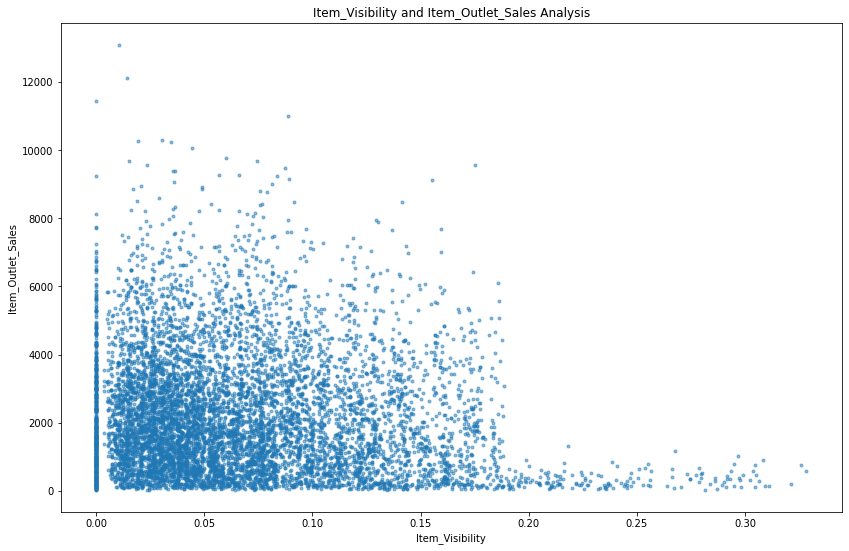

In [10]:
plt.figure(figsize=(14,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.5)

Next we have Outlet_Establishment_Year with Item_Outlet_Sales.

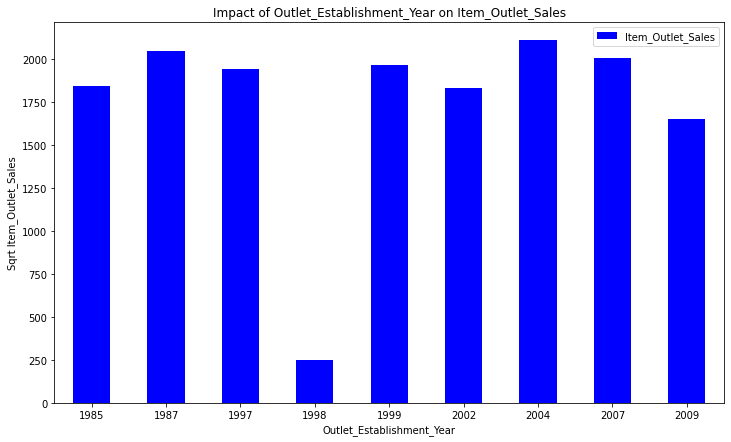

In [11]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Moving on to the categorical variables. First we have Item_Fat_Content with Item_Outlet_Sales.

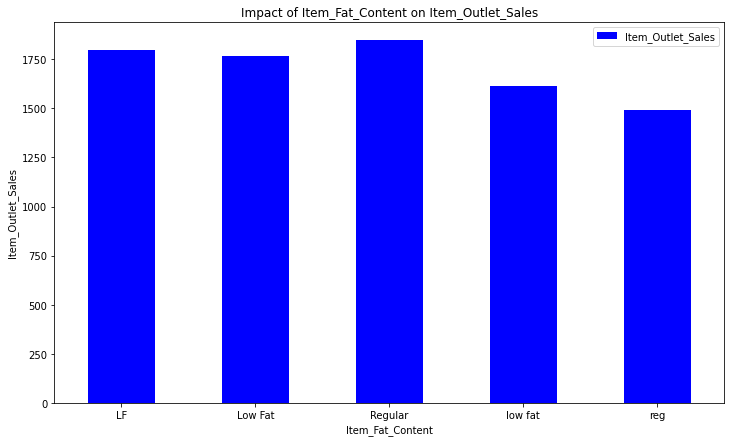

In [12]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat seems to have higher sales than regular fat content. Outlet_Size will be the next attribute to take into consideration

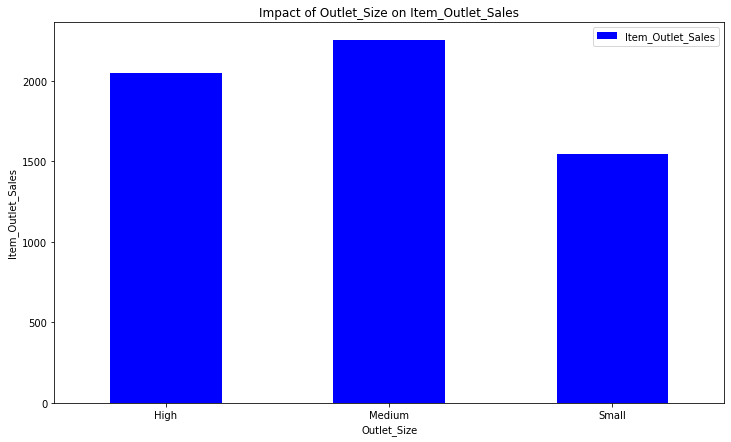

In [13]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Medium-sized stores seem to have highest sales in all 3 types of Outlet Size. Finally we have Outlet_Location_Type.

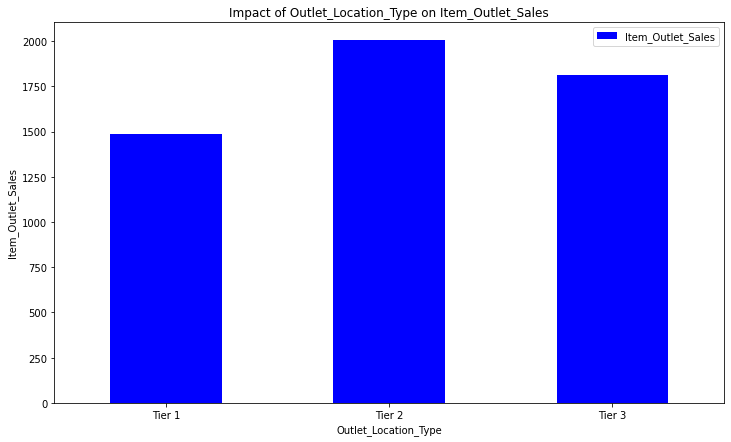

In [14]:
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Even though the amount of tier 2 cities aren't the highest, they still have the highest sales compared with tier 1 and tier 3 cities.

## 3. Data preprocessing:
First we will check for null values in each attributes.

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

As Item_Outlet_Sales is our target variable, all of its values in the test set are null. Therefore we will only impute Item_Weight and Outlet_Size null values.

In [16]:
data.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

We will fill all the null values in Item_Weight with the mean value.

In [17]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [18]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [19]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

We will fill all the null values in Outlet_Size with the mode which is Medium.

In [20]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [21]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

Additionally we can see that some values in Item_Visibility are 0. This isn't ideal and we will count this as a null value and impute with the mean value. 

In [22]:
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')
missing_values = (data['Item_Visibility'] == 0)
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

Next we will convert Outlet_Establishment_Year into a new attribute called Outlet_Age which will calculate the age of outlets to work well with the model

In [23]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year'] #Since the data is collected in 2013

Since 16 types of Item_Type is too much to handle we will reduce it into 3 types of items: Food, Non-Consumables and Drinks based on the first 2 letters of Item_Identifier.

In [24]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2]) #Select the first 2 letters of identifier
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable',                                                            
              'DR':'Drinks'}) #Convert them into readable names

Since there are many labels for both low fat and regular in Item_Fat_Content we will unify them into only 2.

In [25]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

Next we will transform categorical attributes into numerical attributes using Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Item_Fat_Content']= le.fit_transform(data['Item_Fat_Content'])
data['Item_Type_Combined']= le.fit_transform(data['Item_Type_Combined'])
data['Outlet_Size']= le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']= le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']= le.fit_transform(data['Outlet_Type'])

Next we will remove all unecessary columns.

In [27]:
data.drop(['Item_Type','Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'],axis=1,inplace=True)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Type_Combined
0,9.30,0,0.016047,249.8092,1,0,1,3735.1380,train,14,1
1,5.92,1,0.019278,48.2692,1,2,2,443.4228,train,4,0
2,17.50,0,0.016760,141.6180,1,0,1,2097.2700,train,14,1
3,19.20,1,0.017834,182.0950,1,2,0,732.3800,train,15,1
4,8.93,0,0.009780,53.8614,0,2,1,994.7052,train,26,2
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,141.3154,2,0,1,NaN,test,16,1
14200,7.60,1,0.142991,169.1448,1,2,2,NaN,test,4,1
14201,10.00,0,0.073529,118.7440,1,1,1,NaN,test,11,2
14202,15.30,1,0.088380,214.6218,1,1,1,NaN,test,6,1


Finally we will split this data set into the train set and test set and we're ready to work with the data

In [28]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\users\computer\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## 4. Model building:

### a. Linear regression:

In [29]:
x_train = train.drop(['Item_Outlet_Sales'], axis = 1)
y_train = train.Item_Outlet_Sales
x_test = test

We will fit our model to the training data

In [30]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([2062.59894507, 1347.47524857, 2152.65850692, ..., 1704.51842426,
       3252.86898526, 1123.86936997])

In [32]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1197


In [33]:
print("r2: %f" % r2_score(y_train, regressor.predict(x_train)))

r2: 0.507893


### b. Decision Tree:

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [36]:
y_pred = regressor.predict(x_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1935.50411338,
       3572.23183663, 1349.51290433])

In [37]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))
print("r2: %f" % r2_score(y_train, regressor.predict(x_train)))

RMSE : 1095
r2: 0.588298


### c. Random Forest:

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [39]:
y_pred = regressor.predict(x_test)
y_pred

array([1659.43472741, 1361.4274421 ,  596.30606763, ..., 1969.77283817,
       3682.17028101, 1287.77657403])

In [40]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))
print("r2: %f" % r2_score(y_train, regressor.predict(x_train)))

RMSE : 1062
r2: 0.612484
